In [1]:
import numpy as np
import random
import time
import matplotlib.pyplot as plt

### **Here I compare speed of np.random.uniform and random.uniform**

In [92]:
# Decorator for time measuring
def benchmark(func):
    
    def wrapper(*args, **kwargs):
        start = time.time()
        func(*args, **kwargs)
        end = time.time()
        t = end - start
        return t
    return wrapper


@benchmark
def np_random_array_vectorized(length) -> list:
    sample = np.random.uniform(0, 1, length)
    return sample


@benchmark
def random_array(length) -> list:
    sample = [random.uniform(0, 1) for i in range(length)]
    return sample


@benchmark
def np_random_array(length) -> list:
    sample = [np.random.uniform(0, 1) for i in range(length)]
    return sample

### If use length argument in np.random.uniform

In [90]:
sample_len = [10, 100, 1000, 5000, 10000, 50000, 100000, 250000, 500000, 750000, 1000000, 2500000, 5000000, 10000000]
random_time = []
np_time = []
for length in sample_len:
    random_time.append(random_array(length))
    np_time.append(np_random_array_vectorized(length))

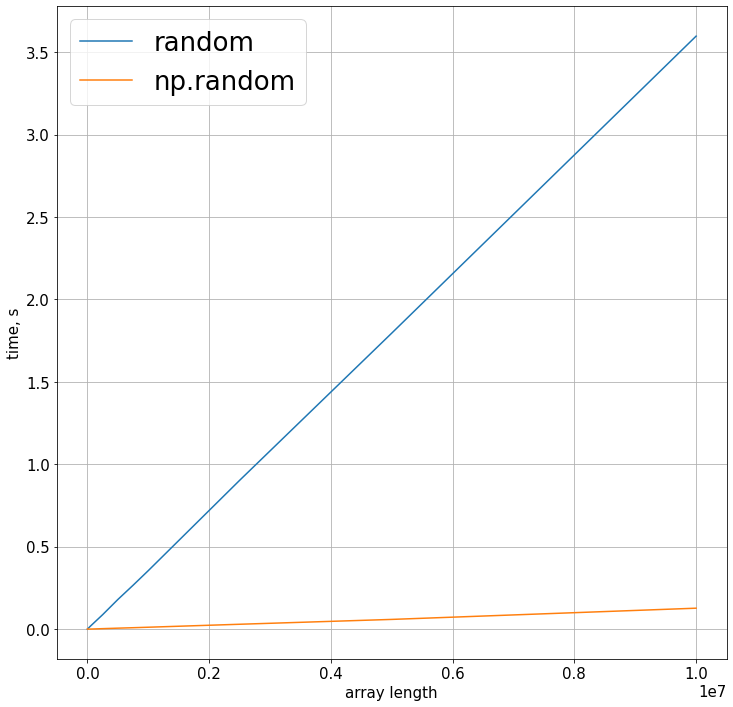

In [91]:
plt.rcParams['font.size'] = 15
plt.figure(figsize=(12, 12))
plt.plot(sample_len, random_time)
plt.plot(sample_len, np_time)
plt.ylabel('time, s')
plt.xlabel('array length')
plt.legend(('random', 'np.random'), prop={'size': 26})
plt.grid()

### If use np.random.uniform without length argument

In [93]:
sample_len = [10, 100, 1000, 5000, 10000, 50000, 100000, 250000, 500000, 750000, 1000000, 2500000, 5000000, 10000000]
random_time = []
np_time = []
for length in sample_len:
    random_time.append(random_array(length))
    np_time.append(np_random_array(length))

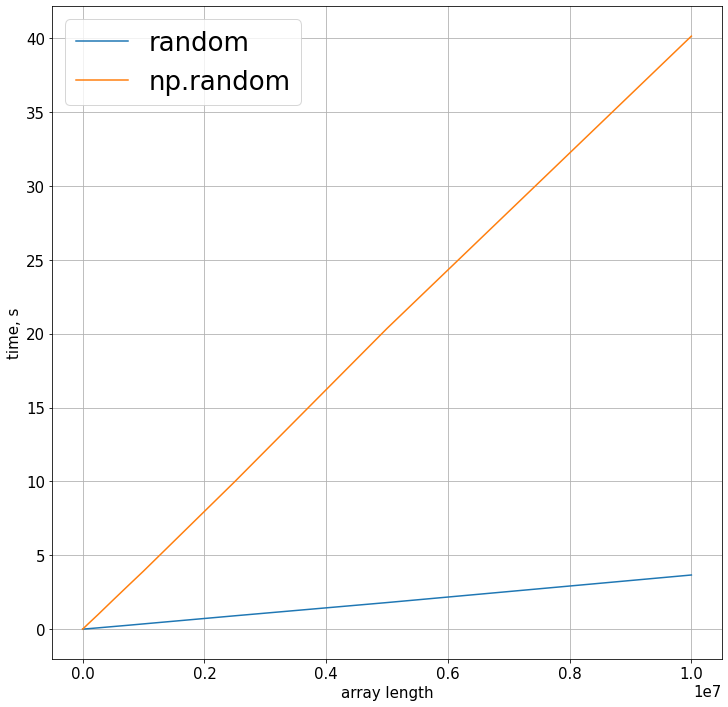

In [94]:
plt.rcParams['font.size'] = 15
plt.figure(figsize=(12, 12))
plt.plot(sample_len, random_time)
plt.plot(sample_len, np_time)
plt.ylabel('time, s')
plt.xlabel('array length')
plt.legend(('random', 'np.random'), prop={'size': 26})
plt.grid()

### **IF SORTED**

In [5]:
def is_sorted(array) -> bool:
    return all(array[i] <= array[i + 1] for i in range(len(array) - 1))

@benchmark
def monkey_sort(array) -> list:
    'Shuffle array until sirted'
    while not is_sorted(array):
        random.shuffle(array)
    return array

In [6]:
array_len = [i for i in range(2, 11)]
monkey_time = []
monkey_std = []
for length in array_len:
    temp_time = []
    for rep in range(8):
        sample_list = [random.uniform(0, 1) for i in range(length)]
        temp_time.append(monkey_sort(sample_list))
    monkey_time.append(np.mean(temp_time))
    monkey_std.append(np.std(temp_time))

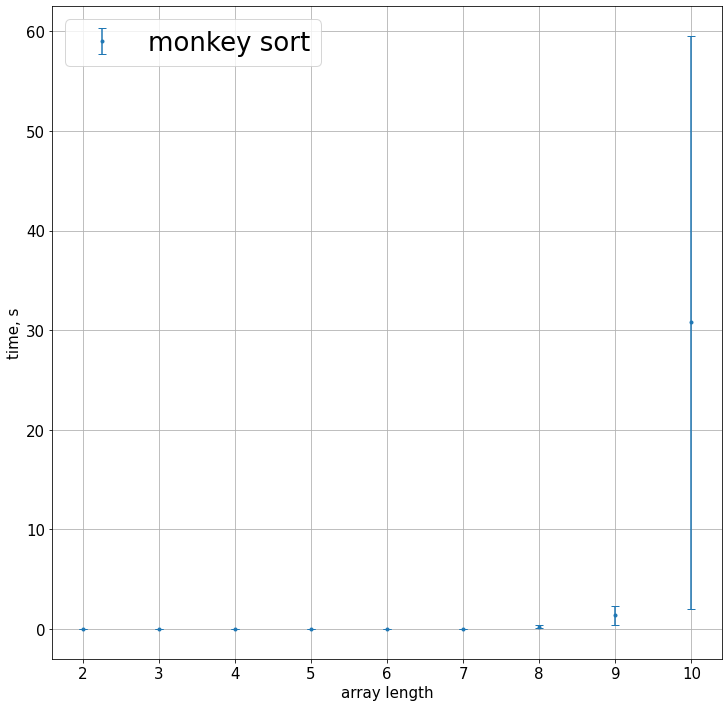

In [7]:
plt.rcParams['font.size'] = 15
plt.figure(figsize=(12, 12))
plt.errorbar(array_len, monkey_time,  monkey_std, linestyle='None', marker='.', capsize=4)
plt.ylabel('time, s')
plt.xlabel('array length')
plt.legend(('monkey sort',), prop={'size': 26})
plt.grid()

### **RANDOM WALK**

In [8]:
def random_walk(start: tuple, duration: int) -> list:
    trajectory = [start]
    x, y = start
    for i in range(duration):
        x += random.uniform(-1, 1)
        y += random.uniform(-1, 1)
        trajectory.append((x, y))
    return trajectory

In [25]:
a = random_walk((0, 0), 100)

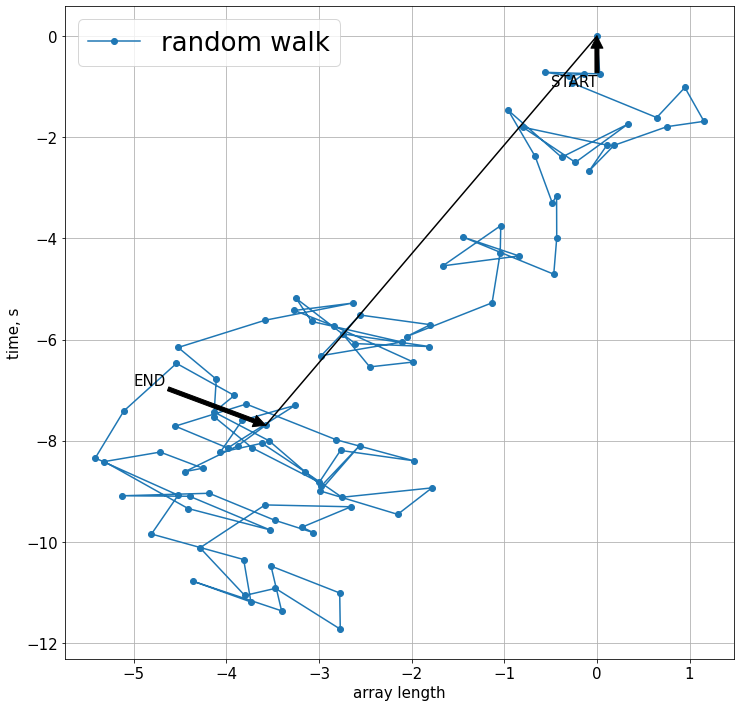

In [26]:
plt.rcParams['font.size'] = 15
plt.figure(figsize=(12, 12))
plt.plot([i[0] for i in a], [i[1] for i in a], marker='o')
plt.plot((0., a[-1][0]), (0., a[-1][1]), color='black')
plt.ylabel('time, s')
plt.xlabel('array length')
plt.legend(('random walk',), prop={'size': 26})
plt.annotate('START', xy=(0., 0.), xytext=(-0.5, -1), arrowprops=dict(facecolor='black', shrink=0.001))
plt.annotate('END', xy=(a[-1][0], a[-1][1]), xytext=(-5., -6.9), arrowprops=dict(facecolor='black', shrink=0.001))
plt.grid()

### **FRACTAL**

### Sierpiński triangle

In [29]:
a = (0, 0)
b = (0, 10)
c = (8.1, 5)
points = [a, b, c]
current_point = np.array((1., 1.))
for i in range(1000000):
    points.append(current_point)
    current_point = 1 / 2 * (current_point + random.choice((a, b, c)))

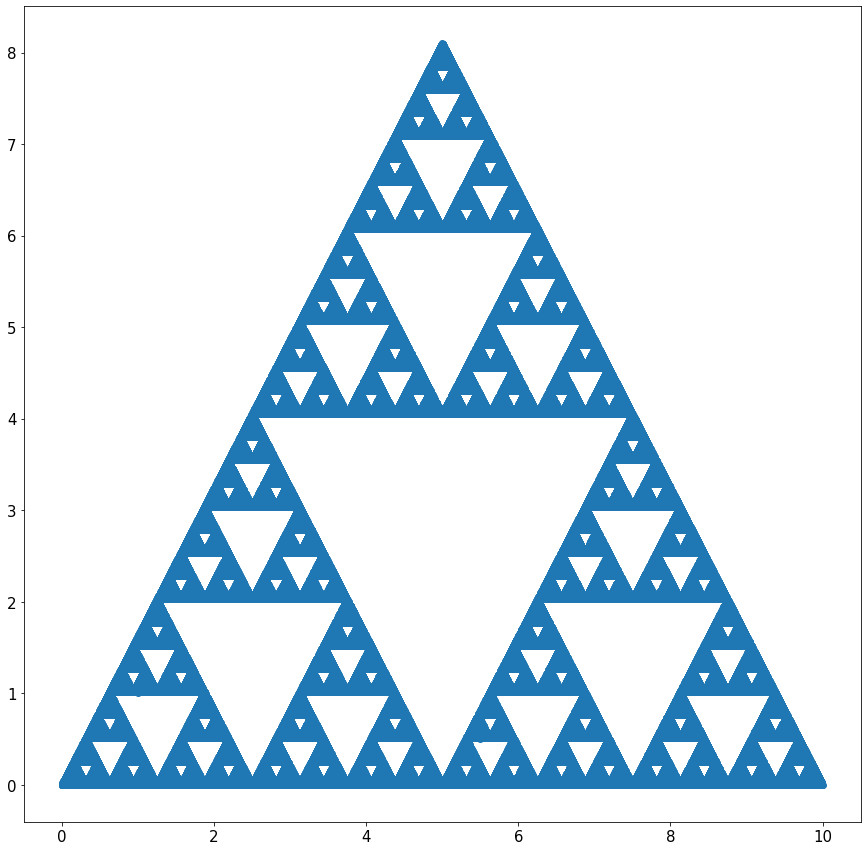

In [31]:
plt.figure(figsize=(15, 15))
plt.scatter([i[1] for i in points], [i[0] for i in points])
plt.show()

### Sierpiński carpet with 4 attractors (angles of square)

In [40]:
a = (0, 0)
b = (0, 10)
c = (10, 0)
d = (10, 10)
points = [a, b, c, d]
current_point = np.array((1., 1.))
for i in range(1000000):
    points.append(current_point)
    current_point = 1 / 3 * (current_point + 2 * np.array(random.choice((a, b, c, d))))

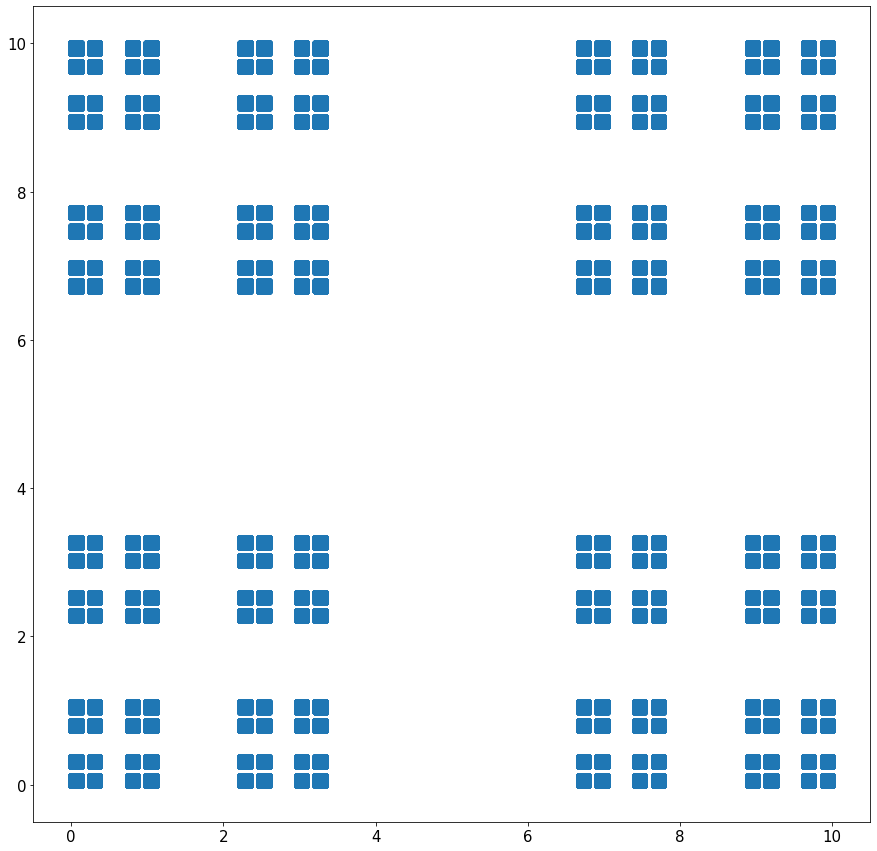

In [41]:
plt.figure(figsize=(15, 15))
plt.scatter([i[1] for i in points], [i[0] for i in points])
plt.show()

### Sierpiński carpet with 8 attractors (angles of square and its centers)

In [68]:
a = (0, 0)
b = (0, 10)
c = (10, 0)
d = (10, 10)
e = (0, 5)
f = (5, 0)
g = (5, 10)
h = (10, 5)
points = [a, b, c, d]
current_point = np.array((1., 1.))
for i in range(1000000):
    points.append(current_point)
    current_point = 1 / 3 * (current_point + 2 * np.array(random.choice((a, b, c, d, e, f, g, h))))

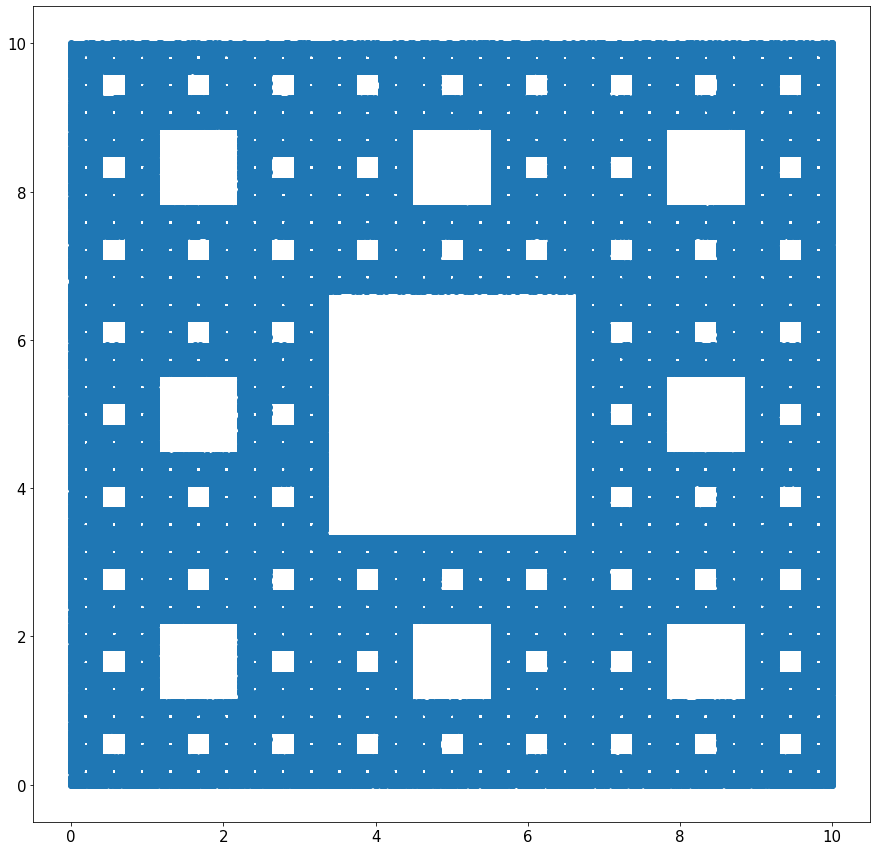

In [69]:
plt.figure(figsize=(15, 15))
plt.scatter([i[1] for i in points], [i[0] for i in points])
plt.show()

## Text

In [79]:
text = input().strip()
words = text.split()
new_words = []
for word in words:
    temp = list(word[1:-1])
    random.shuffle(temp)
    new_word = word[0] + ''.join(temp) + word[-1]
    new_words.append(new_word)
print(' '.join(new_words))

 Модуль random предоставляет функции для генерации случайных чисел, букв, случайного выбора элементов последовательности


Мдолуь rondam патевяодсрелт фунцкии для гецаиенри снлйаучых чиелс, бвку, сгоачйлуно вырбоа этмолнеев поодстсльлеотнеави
